# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(weather_json)

{'coord': {'lon': -79.2353, 'lat': 42.097}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.34, 'feels_like': 76.19, 'temp_min': 74.34, 'temp_max': 76.01, 'pressure': 1011, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 8.99, 'deg': 183, 'gust': 14}, 'clouds': {'all': 1}, 'dt': 1631665872, 'sys': {'type': 2, 'id': 2008828, 'country': 'US', 'sunrise': 1631616977, 'sunset': 1631662128}, 'timezone': -14400, 'id': 5122534, 'name': 'Jamestown', 'cod': 200}


In [4]:
city_name =[]
lat = []
lng =[]
temp = []
humidity = []
clouds = []
wind =[]
date =[]
country =[]
count = 1
sets = 1

print(f"Beginning Data Retrieval")
print(f"........................")
for city in cities:
    try:
        query_city = query_url + city
        weather_response = requests.get(query_city)
        weather_json = weather_response .json()
        city_name.append(weather_json["name"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        temp.append(weather_json["main"]["temp"])
        humidity.append(weather_json["main"]["humidity"])
        clouds.append(weather_json["clouds"]["all"])
        wind.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        print(f"Processing Record {count} of Set{sets} | {weather_json['name']}")
        count += 1
    except:
        print("City not found. Skipping...")
        pass
    if count == 51:
        count = 0
        sets+=1
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
........................
Processing Record 1 of Set1 | Nikolskoye
Processing Record 2 of Set1 | Hermanus
Processing Record 3 of Set1 | Ankazoabo
Processing Record 4 of Set1 | Provideniya
Processing Record 5 of Set1 | Salalah
Processing Record 6 of Set1 | Mahébourg
Processing Record 7 of Set1 | Bairiki Village
Processing Record 8 of Set1 | Codrington
Processing Record 9 of Set1 | Rikitea
Processing Record 10 of Set1 | Nouakchott
City not found. Skipping...
Processing Record 11 of Set1 | Flin Flon
Processing Record 12 of Set1 | Albany
Processing Record 13 of Set1 | Demirci
Processing Record 14 of Set1 | Butaritari
Processing Record 15 of Set1 | Tuktoyaktuk
City not found. Skipping...
Processing Record 16 of Set1 | Bambanglipuro
City not found. Skipping...
Processing Record 17 of Set1 | Azuaga
Processing Record 18 of Set1 | Myitkyina
City not found. Skipping...
Processing Record 19 of Set1 | Khatanga
City not found. Skipping...
Processing Record 20 of Set1 | Kloul

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Country": country,
    "Date": date,
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,46.29,80,12,8.95,RU,1631665996
1,Hermanus,-34.4187,19.2345,49.80,63,100,7.70,ZA,1631665996
2,Ankazoabo,-22.2833,44.5167,66.31,48,0,6.17,MG,1631665996
3,Provideniya,64.3833,-173.3000,48.31,57,90,6.71,RU,1631665997
4,Salalah,17.0151,54.0924,80.69,89,75,6.91,OM,1631665997


In [6]:
weather_data.to_csv("weatherdata.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100 = weather_data.loc[weather_data["Humidity"]>100]
humidity_over_100


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"Skip this step if there are no cities that have humidity > 100%")

Skip this step if there are no cities that have humidity > 100%


In [8]:
weather_data.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,20.270714,17.720353,65.553351,71.069808,51.998255,7.260628,1.631666e+09
std,33.367317,90.866911,15.066665,20.157388,41.321124,5.004219,8.656956e+01
min,-54.800000,-175.200000,17.690000,7.000000,0.000000,0.000000,1.631666e+09
25%,-6.884400,-64.497800,54.410000,61.000000,6.000000,3.440000,1.631666e+09
50%,25.286700,22.154700,68.000000,76.000000,55.000000,6.400000,1.631666e+09
75%,46.720800,101.503600,77.770000,86.000000,99.000000,9.710000,1.631666e+09
max,78.218600,179.316700,99.000000,100.000000,100.000000,29.860000,1.631666e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

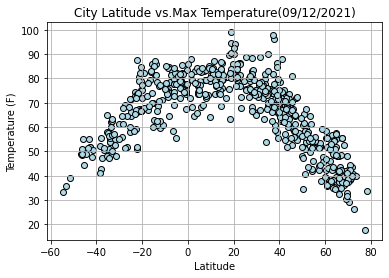

In [12]:
x= weather_data["Lat"]
y= weather_data["Max Temp"]
plt.scatter(x, y, facecolor="lightblue", edgecolor="black", marker="o")
plt.title("City Latitude vs.Max Temperature(09/12/2021)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.savefig("City Latitude vs.Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

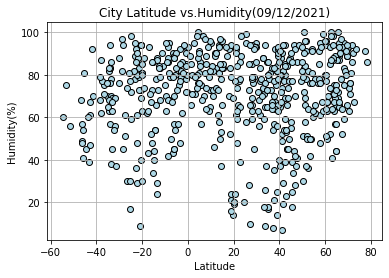

In [13]:
x= weather_data["Lat"]
y= weather_data["Humidity"]
plt.scatter(x, y, facecolor="lightblue", edgecolor="black", marker="o")
plt.title("City Latitude vs.Humidity(09/12/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
plt.savefig("City Latitude vs.Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

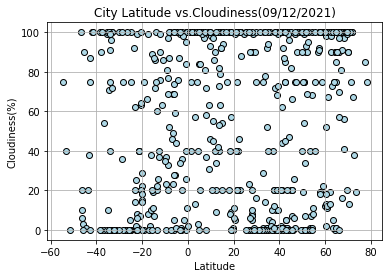

In [14]:
x= weather_data["Lat"]
y= weather_data["Cloudiness"]
plt.scatter(x, y, facecolor="lightblue", edgecolor="black", marker="o")
plt.title("City Latitude vs.Cloudiness(09/12/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.savefig("City Latitude vs.Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

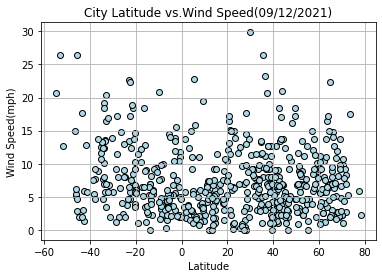

In [15]:
x= weather_data["Lat"]
y= weather_data["Wind Speed"]
plt.scatter(x, y, facecolor="lightblue", edgecolor="black", marker="o")
plt.title("City Latitude vs.Wind Speed(09/12/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)
plt.savefig("City Latitude vs.Wind Speed.png")
plt.show()


Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
northern_hemisphere = weather_data.loc[weather_data["Lat"]>=0.0000]
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,46.29,80,12,8.95,RU,1631665996
3,Provideniya,64.3833,-173.3000,48.31,57,90,6.71,RU,1631665997
4,Salalah,17.0151,54.0924,80.69,89,75,6.91,OM,1631665997
6,Bairiki Village,1.3292,172.9752,87.80,66,75,13.80,KI,1631665997
9,Nouakchott,18.0858,-15.9785,89.53,70,20,7.49,MR,1631665998


In [17]:
x_value = northern_hemisphere["Lat"]
y_value = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.68x +91.47


The r-value is: 0.7077053329679622


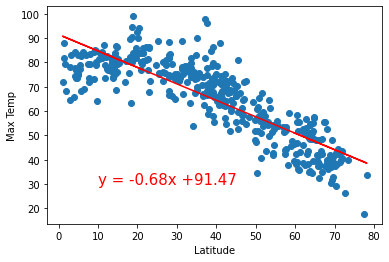

In [18]:
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
southern_hemisphere = weather_data.loc[weather_data["Lat"]<0.0000]
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Hermanus,-34.4187,19.2345,49.80,63,100,7.70,ZA,1631665996
2,Ankazoabo,-22.2833,44.5167,66.31,48,0,6.17,MG,1631665996
5,Mahébourg,-20.4081,57.7000,66.49,94,20,5.75,MU,1631665997
7,Codrington,-38.2667,141.9667,52.21,68,100,5.37,AU,1631665998
8,Rikitea,-23.1203,-134.9692,74.25,78,62,13.42,PF,1631665998


In [20]:
x_value = southern_hemisphere["Lat"]
y_value = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.75x +82.48


The r-value is: 0.6628330199149969


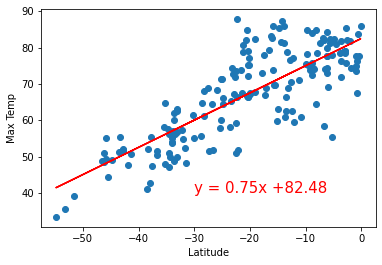

In [21]:
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [22]:
northern_hemisphere = weather_data.loc[weather_data["Lat"]>=0.0000]
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,46.29,80,12,8.95,RU,1631665996
3,Provideniya,64.3833,-173.3000,48.31,57,90,6.71,RU,1631665997
4,Salalah,17.0151,54.0924,80.69,89,75,6.91,OM,1631665997
6,Bairiki Village,1.3292,172.9752,87.80,66,75,13.80,KI,1631665997
9,Nouakchott,18.0858,-15.9785,89.53,70,20,7.49,MR,1631665998


In [23]:
x_value = northern_hemisphere["Lat"]
y_value = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.02x +70.74


The r-value is: 0.0003459732740595227


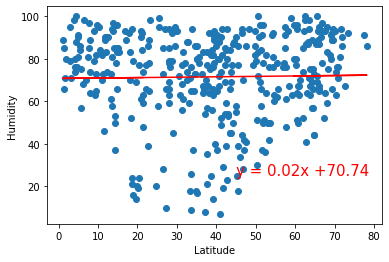

In [24]:
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [25]:
southern_hemisphere = weather_data.loc[weather_data["Lat"]<0.0000]
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Hermanus,-34.4187,19.2345,49.80,63,100,7.70,ZA,1631665996
2,Ankazoabo,-22.2833,44.5167,66.31,48,0,6.17,MG,1631665996
5,Mahébourg,-20.4081,57.7000,66.49,94,20,5.75,MU,1631665997
7,Codrington,-38.2667,141.9667,52.21,68,100,5.37,AU,1631665998
8,Rikitea,-23.1203,-134.9692,74.25,78,62,13.42,PF,1631665998


In [26]:
x_value = southern_hemisphere["Lat"]
y_value = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.29x +76.17


The r-value is: 0.046251458992874195


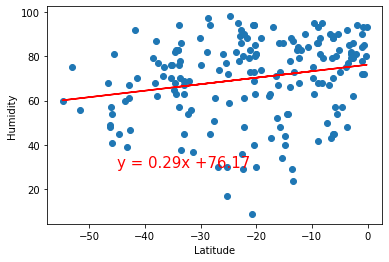

In [27]:
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [28]:
northern_hemisphere = weather_data.loc[weather_data["Lat"]>=0.0000]
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,46.29,80,12,8.95,RU,1631665996
3,Provideniya,64.3833,-173.3000,48.31,57,90,6.71,RU,1631665997
4,Salalah,17.0151,54.0924,80.69,89,75,6.91,OM,1631665997
6,Bairiki Village,1.3292,172.9752,87.80,66,75,13.80,KI,1631665997
9,Nouakchott,18.0858,-15.9785,89.53,70,20,7.49,MR,1631665998


In [29]:
x_value = northern_hemisphere["Lat"]
y_value = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.14x +50.1


The r-value is: 0.0043113961249810605


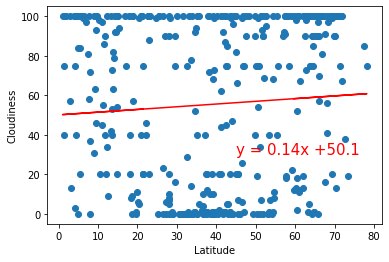

In [30]:
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [31]:
southern_hemisphere = weather_data.loc[weather_data["Lat"]<0.0000]
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Hermanus,-34.4187,19.2345,49.80,63,100,7.70,ZA,1631665996
2,Ankazoabo,-22.2833,44.5167,66.31,48,0,6.17,MG,1631665996
5,Mahébourg,-20.4081,57.7000,66.49,94,20,5.75,MU,1631665997
7,Codrington,-38.2667,141.9667,52.21,68,100,5.37,AU,1631665998
8,Rikitea,-23.1203,-134.9692,74.25,78,62,13.42,PF,1631665998


In [32]:
x_value = southern_hemisphere["Lat"]
y_value = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.12x +47.0


The r-value is: 0.0017660043889159375


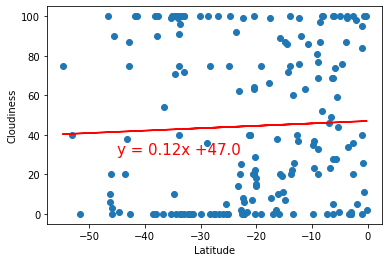

In [33]:
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [34]:
northern_hemisphere = weather_data.loc[weather_data["Lat"]>=0.0000]
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,46.29,80,12,8.95,RU,1631665996
3,Provideniya,64.3833,-173.3000,48.31,57,90,6.71,RU,1631665997
4,Salalah,17.0151,54.0924,80.69,89,75,6.91,OM,1631665997
6,Bairiki Village,1.3292,172.9752,87.80,66,75,13.80,KI,1631665997
9,Nouakchott,18.0858,-15.9785,89.53,70,20,7.49,MR,1631665998


In [35]:
x_value = northern_hemisphere["Lat"]
y_value = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.02x +6.23


The r-value is: 0.0050595201167613945


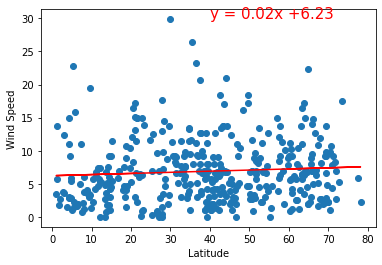

In [36]:
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [37]:
southern_hemisphere = weather_data.loc[weather_data["Lat"]<0.0000]
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Hermanus,-34.4187,19.2345,49.80,63,100,7.70,ZA,1631665996
2,Ankazoabo,-22.2833,44.5167,66.31,48,0,6.17,MG,1631665996
5,Mahébourg,-20.4081,57.7000,66.49,94,20,5.75,MU,1631665997
7,Codrington,-38.2667,141.9667,52.21,68,100,5.37,AU,1631665998
8,Rikitea,-23.1203,-134.9692,74.25,78,62,13.42,PF,1631665998


In [38]:
x_value = southern_hemisphere["Lat"]
y_value = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.12x +5.62


The r-value is: 0.08869300177730448


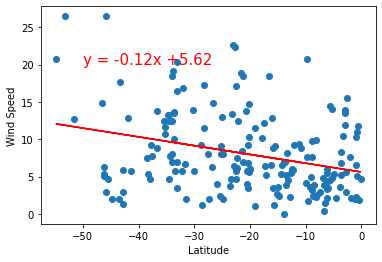

In [39]:
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()